In [2]:
import cv2
from matplotlib import pyplot as plt
print(cv2.__version__)

4.5.5


In [1]:
img = cv2.imread('../pics/sailing.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

NameError: name 'cv2' is not defined

Text(0.5, 1.0, 'Sailing in SF Bay - gray')

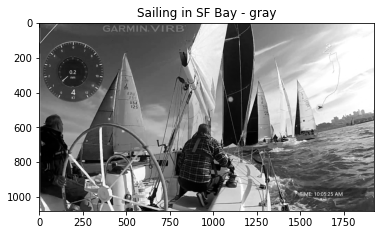

In [3]:
plt.imshow(gray, cmap = 'gray')
plt.title('Sailing in SF Bay - gray')

Text(0.5, 1.0, 'Sailing in SF Bay - color')

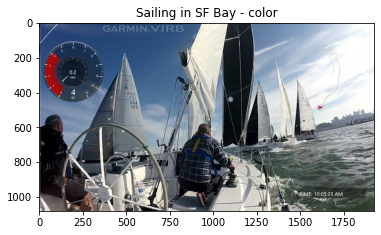

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Sailing in SF Bay - color')

Text(0.5, 1.0, 'Sailing in SF Bay - color')

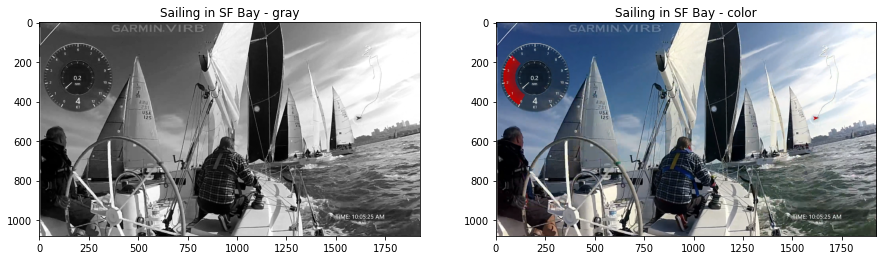

In [5]:
f = plt.figure(figsize=(15,15))
f.add_subplot(1,2,1)
plt.imshow(gray, cmap = 'gray')
plt.title('Sailing in SF Bay - gray')
f.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Sailing in SF Bay - color')

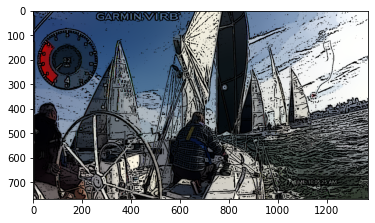

In [3]:
# from: https://www.geeksforgeeks.org/cartooning-an-image-using-opencv-python/
class Cartoonizer: 
    """Cartoonizer effect 
        A class that applies a cartoon effect to an image. 
        The class uses a bilateral filter and adaptive thresholding to create 
        a cartoon effect. 
    """
    def __init__(self): 
        pass
  
    def render(self, img_rgb): 
        img_rgb = cv2.imread(img_rgb) 
        img_rgb = cv2.resize(img_rgb, (1366,768)) 
        numDownSamples = 2     # number of downscaling steps 
        numBilateralFilters = 50 # number of bilateral filtering steps 

        # downsample image using Gaussian pyramid 
        img_color = img_rgb 
        for _ in range(numDownSamples): 
            img_color = cv2.pyrDown(img_color) 

        # repeatedly apply small bilateral filter instead of applying 
        # one large filter 
        for _ in range(numBilateralFilters): 
            img_color = cv2.bilateralFilter(img_color, 9, 9, 7) 
  
        # upsample image to original size 
        for _ in range(numDownSamples): 
            img_color = cv2.pyrUp(img_color) 

        # -- STEPS 2 and 3 -- 
        # convert to grayscale and apply median blur 
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY) 
        img_blur = cv2.medianBlur(img_gray, 3) 

        # -- STEP 4 -- 
        # detect and enhance edges 
        img_edge = cv2.adaptiveThreshold(img_blur, 255, 
                                        cv2.ADAPTIVE_THRESH_MEAN_C, 
                                        cv2.THRESH_BINARY, 9, 2) 
        # -- STEP 5 -- 
        # convert back to color so that it can be bit-ANDed with color image 
        (x,y,z) = img_color.shape 
        img_edge = cv2.resize(img_edge,(y,x)) 
        img_edge = cv2.cvtColor(img_edge, cv2.COLOR_GRAY2RGB) 
        cv2.imwrite("edge.png",img_edge) 
        return cv2.bitwise_and(img_color, img_edge) 
  
tmp_canvas = Cartoonizer() 
  
file_name = "sailing.png" 
res = tmp_canvas.render(file_name) 
  
cv2.imwrite("sailing.jpg", res) 
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

In [11]:
"""
# reading image 
img = cv2.imread("sailing.png")
   
# Edges
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 5)
edges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                         cv2.THRESH_BINARY, 9, 9)
   
# Cartoonization
color = cv2.bilateralFilter(img, 9, 50, 50)
cartoon = cv2.bitwise_and(color, color, mask=edges)
   
#cv2.imshow("Image", img)
#cv2.imshow("edges", edges)
#cv2.imshow("Cartoon", cartoon)

#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))
#plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))

#cv2.waitKey(0)
#cv2.destroyAllWindows()
"""

'\n# reading image \nimg = cv2.imread("sailing.png")\n   \n# Edges\ngray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)\ngray = cv2.medianBlur(gray, 5)\nedges = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \n                                         cv2.THRESH_BINARY, 9, 9)\n   \n# Cartoonization\ncolor = cv2.bilateralFilter(img, 9, 50, 50)\ncartoon = cv2.bitwise_and(color, color, mask=edges)\n   \n#cv2.imshow("Image", img)\n#cv2.imshow("edges", edges)\n#cv2.imshow("Cartoon", cartoon)\n\n#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))\n#plt.imshow(cv2.cvtColor(edges, cv2.COLOR_BGR2RGB))\n#plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB))\n\n#cv2.waitKey(0)\n#cv2.destroyAllWindows()\n'

In [2]:
from ipyleaflet import Map, basemaps, basemap_to_tiles

m = Map(
    basemap=basemap_to_tiles(basemaps.NASAGIBS.ModisTerraTrueColorCR, "2017-04-08"),
    center=(52.204793, 360.121558),
    zoom=4
)

m

Map(center=[52.204793, 360.121558], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title'…